# Tips

### Introduction:

This exercise was created based on the tutorial and documentation from [Seaborn](https://stanford.edu/~mwaskom/software/seaborn/index.html)  
The dataset being used is tips from Seaborn.

### Step 1. Import the necessary libraries:

In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/07_Visualization/Tips/tips.csv). 

### Step 3. Assign it to a variable called tips

In [2]:
url = 'https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/07_Visualization/Tips/tips.csv'

tips = pd.read_csv(url, index_col=0)
tips.reset_index()
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


### Step 4. Delete the Unnamed 0 column

In [3]:
# already done

### Step 5. Plot the total_bill column histogram

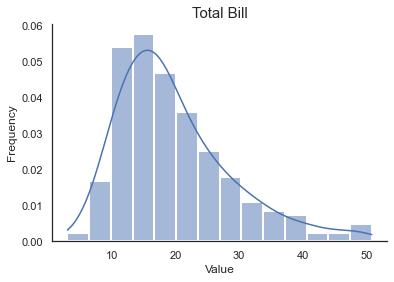

In [4]:
sns.set(style='white')
sns.set_context(rc = {'patch.linewidth': 2.0})

ax = sns.histplot(tips['total_bill'], kde=True, stat='density')
ax.set(xlabel='Value', ylabel='Frequency')
ax.set_title('Total Bill', size=15)

sns.despine();

/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


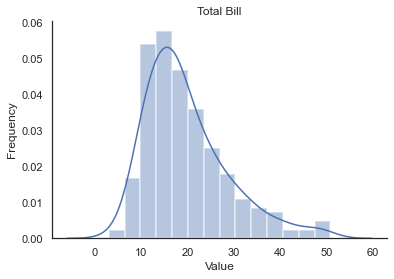

In [5]:
# Original solution:

# create histogram
ttbill = sns.distplot(tips.total_bill);

# set lables and titles
ttbill.set(xlabel = 'Value', ylabel = 'Frequency', title = "Total Bill")

# take out the right and upper borders
sns.despine()

### Step 6. Create a scatter plot presenting the relationship between total_bill and tip

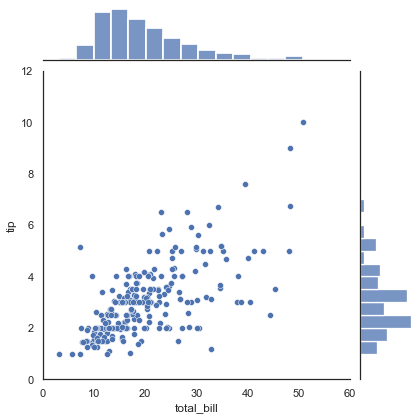

In [6]:
sns.jointplot(x=tips['total_bill'], y=tips['tip'], xlim=(0, 60), ylim=(0, 12));

### Step 7.  Create one image with the relationship of total_bill, tip and size.
#### Hint: It is just one function.

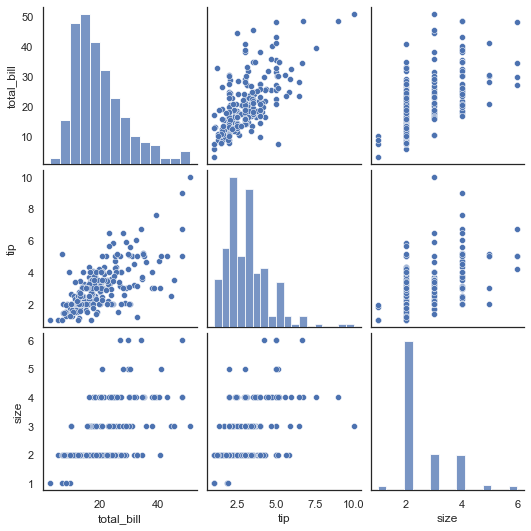

In [7]:
sns.pairplot(data=tips[['total_bill', 'tip', 'size']]);

# Original solution:
#
# sns.pairplot(tips)

### Step 8. Present the relationship between days and total_bill value

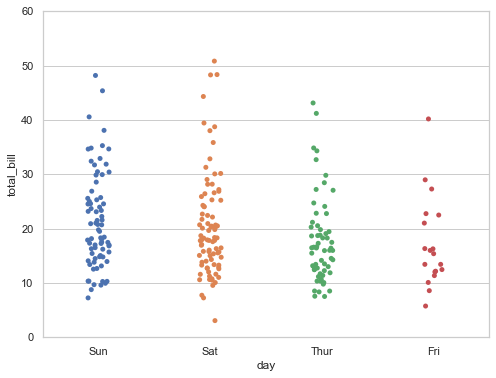

In [8]:
sns.set_style('whitegrid')
plt.figure(figsize=(8, 6))
ax = sns.stripplot(x=tips['day'], y=tips['total_bill'])
ax.set_ylim(0, 60);

# Original solution:
#
# sns.stripplot(x = "day", y = "total_bill", data = tips, jitter = True);

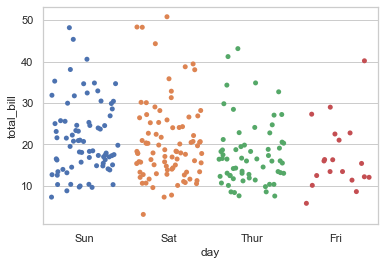

In [9]:
# What a "jitter" is (for demonstration purposes):
sns.stripplot(x = "day", y = "total_bill", data = tips, jitter = 0.4);

### Step 9. Create a scatter plot with the day as the y-axis and tip as the x-axis, differ the dots by sex

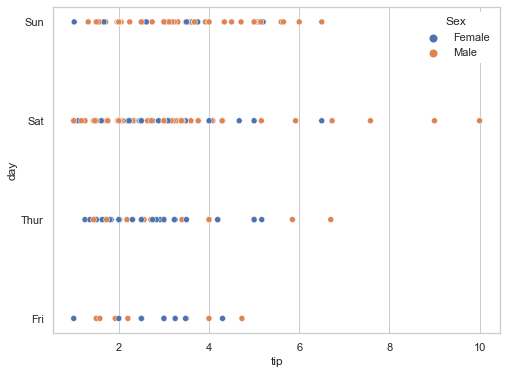

In [10]:
sns.set_style("whitegrid")
plt.figure(figsize=(8, 6))

ax = sns.scatterplot(data=tips, x='tip', y='day', hue='sex');
ax.yaxis.grid(False)
ax.legend(title='Sex', framealpha = 1, edgecolor='w');

# Original solution:
#
# sns.stripplot(x = "tip", y = "day", hue = "sex", data = tips, jitter = True);

### Step 10.  Create a box plot presenting the total_bill per day differetiation the time (Dinner or Lunch)

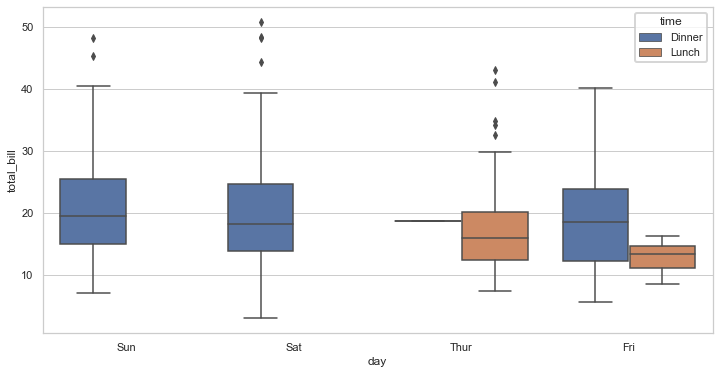

In [11]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=tips, x='day', y='total_bill', hue='time');

### Step 11. Create two histograms of the tip value based for Dinner and Lunch. They must be side by side.

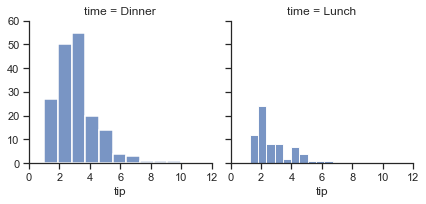

In [12]:
sns.set_style('ticks')
g = sns.FacetGrid(data=tips, col='time')
g.map(sns.histplot, 'tip', bins=10)
g.set(xlim=(0, 12), ylim=(0, 60), xticks=range(0, 13, 2), yticks=range(0, 61, 10));
sns.despine();

# Original solution:
#
# # better seaborn style
# sns.set(style = "ticks")
# # creates FacetGrid
# g = sns.FacetGrid(tips, col = "time")
# g.map(plt.hist, "tip");

### Step 12. Create two scatterplots graphs, one for Male and another for Female, presenting the total_bill value and tip relationship, differing by smoker or no smoker
### They must be side by side.

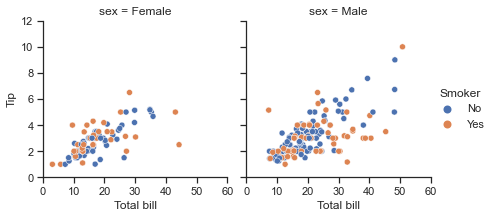

In [13]:
g = sns.FacetGrid(data=tips, col='sex')
g.map_dataframe(sns.scatterplot, x='total_bill', y='tip', hue='smoker')
g.add_legend(title='Smoker')
g.set_axis_labels('Total bill', 'Tip')
g.set(xlim=(0, 60), ylim=(0, 12), xticks=range(0, 61, 10), yticks=range(0, 13, 2));


# Original solution:
#
# g = sns.FacetGrid(tips, col = "sex", hue = "smoker")
# g.map(plt.scatter, "total_bill", "tip", alpha =.7)
# g.add_legend();

### BONUS: Create your own question and answer it using a graph.

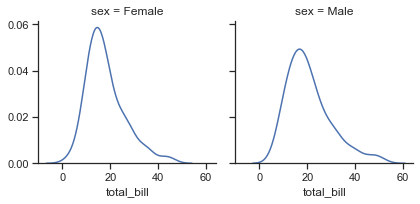

In [14]:
g = sns.FacetGrid(data=tips, col='sex')
g.map(sns.kdeplot, 'total_bill');

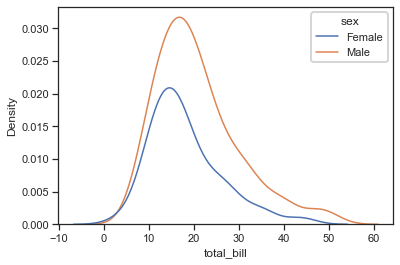

In [15]:
sns.kdeplot(tips['total_bill'], hue=tips['sex']);

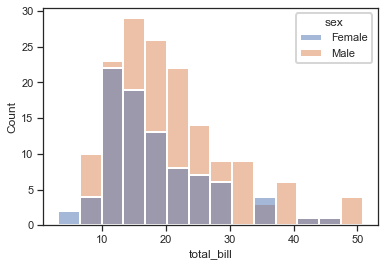

In [16]:
sns.histplot(data=tips, x='total_bill', hue='sex');

In [17]:
tips.groupby('sex')[['total_bill']].sum()

,total_bill
sex,
Female,1570.95
Male,3256.82


In [18]:
tips.groupby('sex')[['total_bill']].count()

,total_bill
sex,
Female,87
Male,157


In [19]:
males = tips[tips['sex'] == 'Male'].sample(87)
males.head()

,total_bill,tip,sex,smoker,day,time,size
87,18.28,4.00,Male,No,Thur,Lunch,2
207,38.73,3.00,Male,Yes,Sat,Dinner,4
55,19.49,3.51,Male,No,Sun,Dinner,2
228,13.28,2.72,Male,No,Sat,Dinner,2
220,12.16,2.20,Male,Yes,Fri,Lunch,2


In [20]:
females = tips[tips['sex'] == 'Female']
females.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
11,35.26,5.00,Female,No,Sun,Dinner,4
14,14.83,3.02,Female,No,Sun,Dinner,2
16,10.33,1.67,Female,No,Sun,Dinner,3


In [21]:
new_tips = pd.concat([males, females]).reset_index()
new_tips.head()

,index,total_bill,tip,sex,smoker,day,time,size
0,87,18.28,4.00,Male,No,Thur,Lunch,2
1,207,38.73,3.00,Male,Yes,Sat,Dinner,4
2,55,19.49,3.51,Male,No,Sun,Dinner,2
3,228,13.28,2.72,Male,No,Sat,Dinner,2
4,220,12.16,2.20,Male,Yes,Fri,Lunch,2


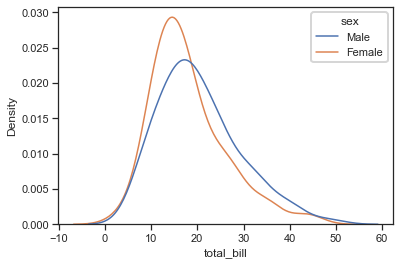

In [22]:
sns.kdeplot(data=new_tips, x='total_bill', hue='sex');

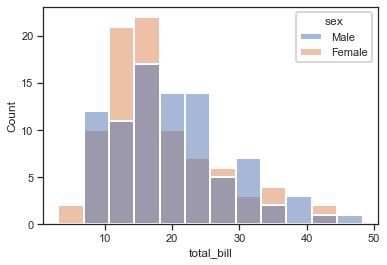

In [23]:
sns.histplot(data=new_tips, x='total_bill', hue='sex');

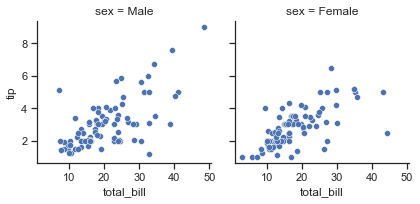

In [24]:
g = sns.FacetGrid(data=new_tips, col='sex')
g.map(sns.scatterplot, 'total_bill', 'tip');